In [337]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [338]:
# Hyperparameters
LR = 0.001
EPOCHS=252
BATCH_SIZE=64
VALIDATION_SPLIT=0.1

In [339]:
# Load the dataset
df = pd.read_csv('CCD.csv', header=1)

# Split into input and target data, removing useless headers
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Use one hot encoding on categorical input variables
X = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])


In [340]:
# Scale the features using a robust scaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [341]:
# Oversampling
oversampler = SMOTE()
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)
input_shape = X_train_resampled.shape[1:]

In [342]:
# Build the deep learning model
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=LR), metrics=['accuracy'])

# Train the model on the oversampled data
history = model.fit(X_train_resampled, Y_train_resampled, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT, callbacks=[early_stopping], )


Epoch 1/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.6645 - loss: 0.6243 - val_accuracy: 0.6046 - val_loss: 0.6076
Epoch 2/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7138 - loss: 0.5637 - val_accuracy: 0.5911 - val_loss: 0.6448
Epoch 3/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7289 - loss: 0.5489 - val_accuracy: 0.5976 - val_loss: 0.6148
Epoch 4/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.7209 - loss: 0.5472 - val_accuracy: 0.6086 - val_loss: 0.6258
Epoch 5/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.7294 - loss: 0.5443 - val_accuracy: 0.6789 - val_loss: 0.5489
Epoch 6/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7292 - loss: 0.5402 - val_accuracy: 0.6239 - val_loss: 0.6021
Epoch 7/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7307 - loss: 0.5356 - val_accuracy: 0.6502 - val_loss: 0.5969
Epoch 8/252
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7343 - loss: 0

In [346]:

# Evaluate the model on the test set
loss, accuracy= model.evaluate(X_test, Y_test, verbose=1)


# Compute F1 score
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
f1 = f1_score(Y_test, y_pred)

print(f'Test Loss: {loss}, Test Accuracy: {accuracy}, Test F1 Score: {f1}')

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - accuracy: 0.7187 - loss: 0.5816
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step
Test Loss: 0.5727943181991577, Test Accuracy: 0.7248888611793518, Test F1 Score: 0.4997979797979798


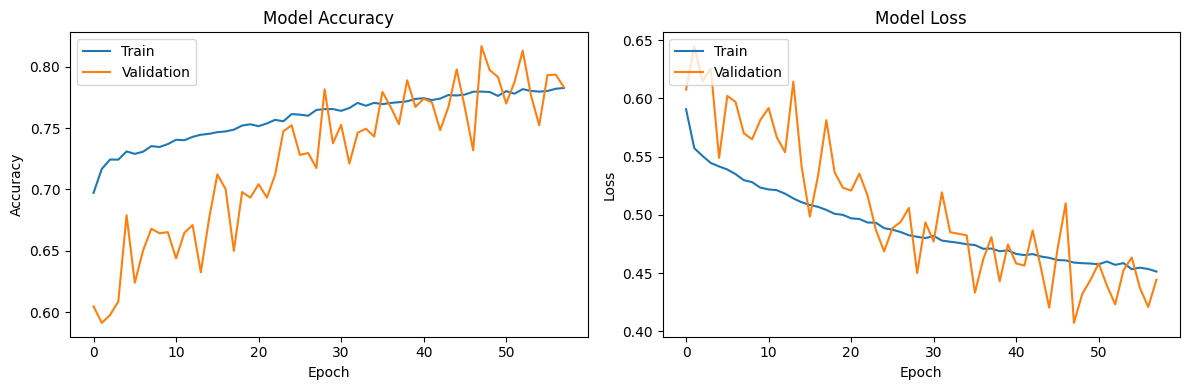

In [347]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 183us/step


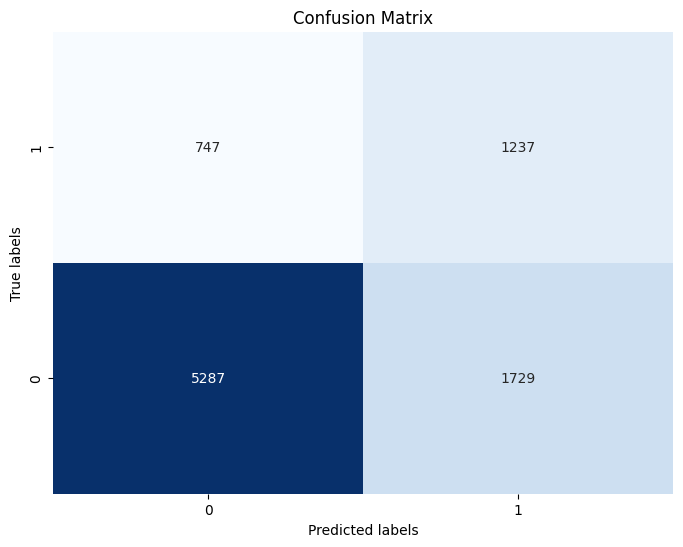

In [345]:
# Predict probabilities on the test set
Y_pred_prob = model.predict(X_test)
# Convert probabilities to class predictions
Y_pred = np.where(Y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
cm = np.flipud(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], [0, 1])
plt.yticks([0.5, 1.5], [1, 0])
plt.show()